Text(0, 0.5, 'Minutes of Time')

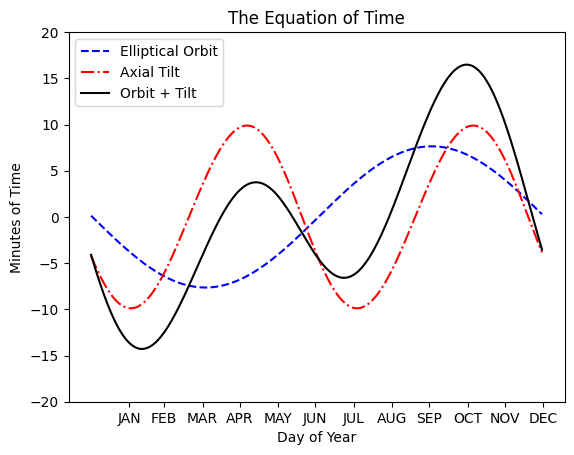

In [172]:
import matplotlib.pyplot as plt
import numpy as np

#calculates time difference due to elliptical orbit of Earth
def elliptical_orbit(N):
    M = ((2 * np.pi) / 365.24) * (N - 2)
    e = 0.016713 #ellipticity of orbit
    T = M + (2 * e * np.sin(M))
    time = (M - T) * (86400 / (361 * (np.pi/180)))
    return time

#calculates time difference due to 23.5 degree axial tilt of Earth
def axial_tilt(N):
    E = (360 / 365.24) * (N - 80)
    if E >= 270:
        E = E - 360
    elif E >= 90:
        E = E - 180
    a = 23.5 #axial tilt of earth
    B = np.degrees(np.arctan(np.tan(np.radians(E)) * np.cos(np.radians(23.5)))) #conversion to degrees
    time = (E - B) * (86400 / 361)
    return time

arrEO = np.arange(1.0, 366.0)
for i in range(len(arrEO)):
    arrEO[i] = (elliptical_orbit(arrEO[i])) / 60
    
arrAT = np.arange(1.0, 366.0)
for i in range(len(arrAT)):
    arrAT[i] = (axial_tilt(arrAT[i])) / 60

arrTOTAL = np.arange(1.0, 366.0)
for i in range(len(arrTOTAL)):
    arrTOTAL[i] = (elliptical_orbit(arrTOTAL[i]) + axial_tilt(arrTOTAL[i]))  / 60;
    
fig, ax = plt.subplots()
ax.set_xticks([31,59,90,120,151,181,212,243,273,304,334,365])
ax.set_xticklabels(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

ax.plot(arrEO, color='blue', linestyle = '--', label = 'Elliptical Orbit')
ax.plot(arrAT, color='red', linestyle = '-.', label = 'Axial Tilt')
ax.plot(arrTOTAL, color='black', label = 'Orbit + Tilt')

plt.ylim(-20, 20)
plt.legend()
plt.title('The Equation of Time')
plt.xlabel('Day of Year')
plt.ylabel('Minutes of Time')